In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import h5py
import settings.Constants as const

In [2]:
import matplotlib.cm as cm
colorsVzero = [cm.Reds(i) for i in [0.2, 0.5, 0.8, 1.0]]
colorsTzero = [cm.Greens(i) for i in [0.5, 0.7, 0.9, 1.0]]

In [3]:

lambdaValue = 0.0
omegaSpace = np.linspace(-2.0, 2.0, 80)
couplingValue = 0.7

Tvalue = 1e-5
voltageSpace = np.array([0.0, 1.0782277033434142, 1.428227703343414, 1.778227703343414])

TSpace = [1e-5, 1e-2, 0.1, 0.5]
voltageValue = 0.0


In [4]:
h5_name = "h5_output_data/resultsCurrentNoiseNonInt.h5"

with h5py.File(h5_name, 'r') as f:
    
    retardedNonIntTzero = f['ShotNoise/NonIntRetardedOmegaTZero'][:]
    keldyshNonIntTzero= f['ShotNoise/NonIntKeldyshOmegaTZero'][:]
    
    retardedNonIntVzero = f['ShotNoise/NonIntRetardedOmegaTFinite'][:]
    keldyshNonIntVzero = f['ShotNoise/NonIntKeldyshOmegaTFinite'][:]
    


h5_name = "h5_output_data/resultsCurrentNoiseNonIntV2.h5"

with h5py.File(h5_name, 'r') as f:
    
    retardedNonIntTzero = f['ShotNoise/NonIntRetardedOmegaTZero'][:]
    keldyshNonIntTzero= f['ShotNoise/NonIntKeldyshOmegaTZero'][:]
    
    # retardedNonIntVzero = f['ShotNoise/NonIntRetardedOmegaTFinite'][:]
    # keldyshNonIntVzero = f['ShotNoise/NonIntKeldyshOmegaTFinite'][:]
    

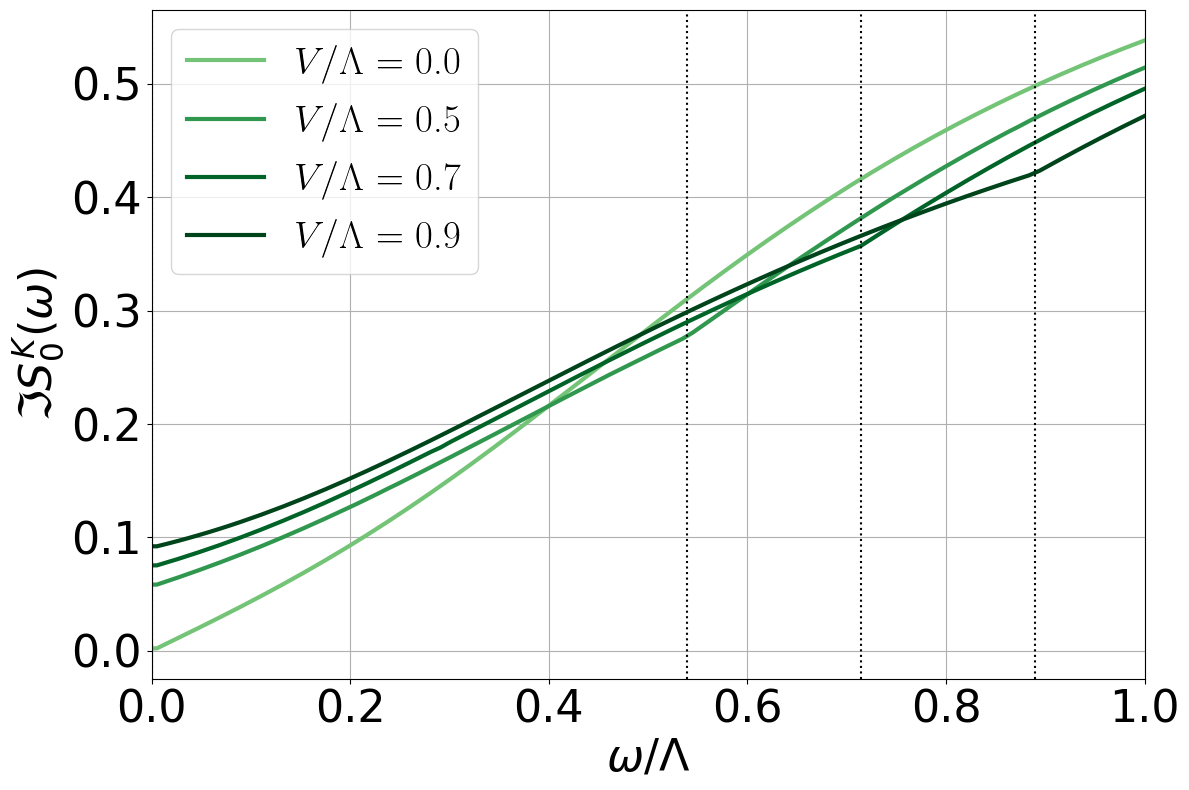

In [5]:

omegaSpace = np.linspace(-2.0, 2.0, 190)

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(len(voltageSpace)):
    plt.plot(omegaSpace/2, keldyshNonIntTzero[i,:].real,  label=r'$V/\Lambda$ = ' + str(round(voltageSpace[i]/2,1)), linewidth=3, color=colorsTzero[i])
    ax.axvline(voltageSpace[i]/2, linestyle="dotted", color="black")
plt.legend(fontsize=28)
plt.grid()
plt.xlabel(r'$\omega/\Lambda$', fontsize=32)
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0.0, 1.0)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.ylabel(r'$\Im S_{0}^K(\omega)$', fontsize=32)
plt.tight_layout()
plt.savefig("panelsCurrentNoise/ImSK_NonInt_Tomega.png", bbox_inches='tight', dpi=600)


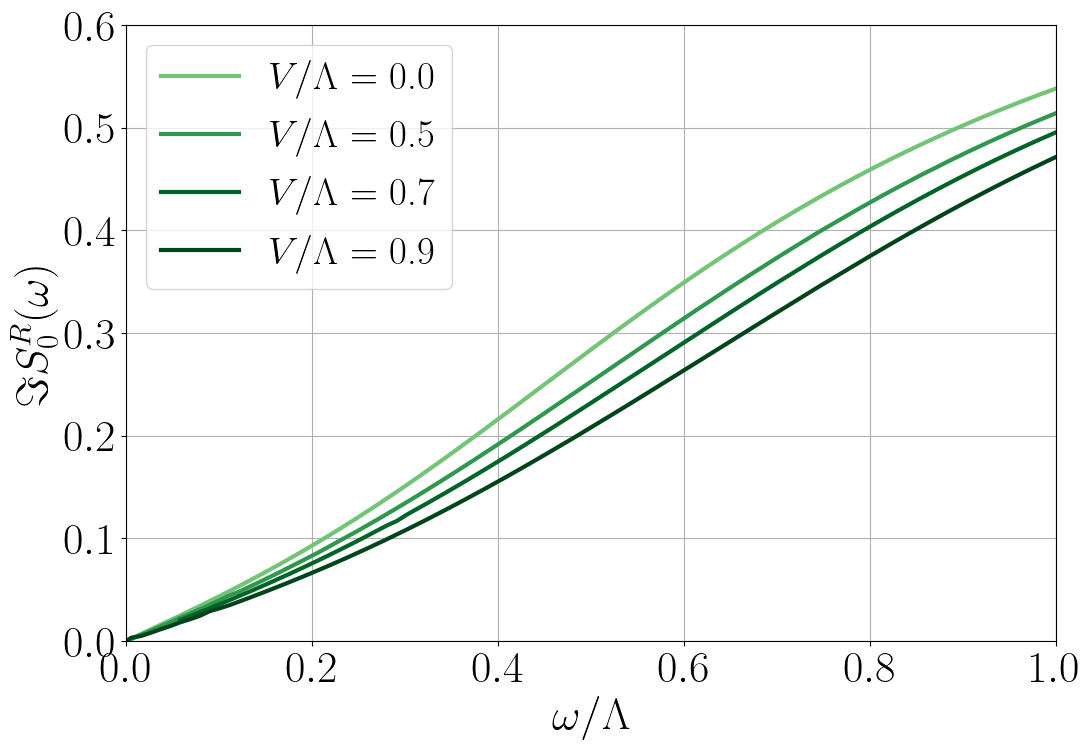

In [6]:



fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

retardedNonIntTzero[2,90:100] = np.nan

for i in range(len(voltageSpace)):
    plt.plot(omegaSpace/2, retardedNonIntTzero[i,:].real, label=r'$V/\Lambda$ = ' + str(round(voltageSpace[i]/2,1)), linewidth=3, color=colorsTzero[i])

# retarded_test = retardedNonIntTzero[2,:].real.copy()
# retarded_test[90:100] = np.nan

# plt.plot(omegaSpace/2, retarded_test, '.', label=r'$V/\Lambda$ = ' + str(round(voltageSpace[i]/2,1)), linewidth=3, color=colorsTzero[i])


plt.legend(fontsize=28)
plt.grid()
plt.xlabel(r'$\omega/\Lambda$', fontsize=32)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(0.0, 1)

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 0.6)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.ylabel(r'$\Im S_{0}^R(\omega)$', fontsize=32)
plt.savefig("panelsCurrentNoise/ImSR_NonInt_Tomega.png", bbox_inches='tight', dpi=600)

(10,)


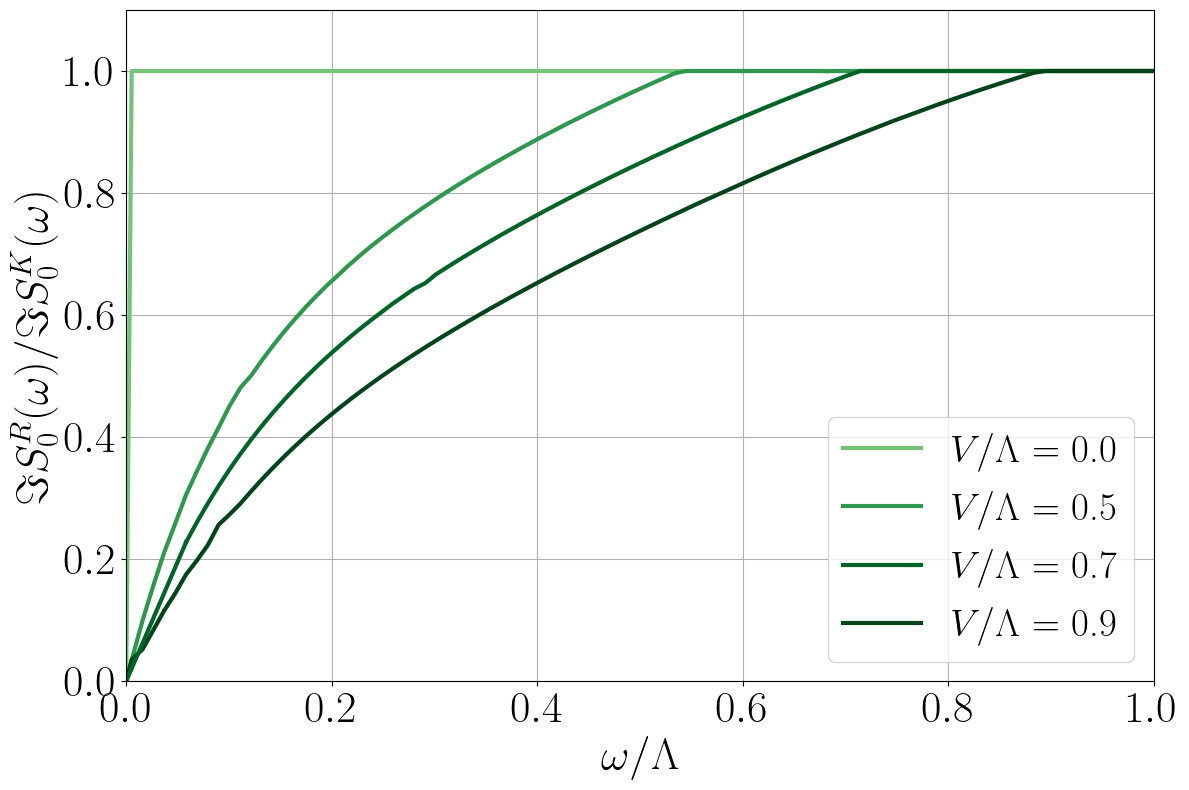

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'


for i in range(0,len(voltageSpace)):
    plt.plot(omegaSpace/2, retardedNonIntTzero[i,:].real/keldyshNonIntTzero[i, :].real, label=r'$V/\Lambda$ = ' + str(round(voltageSpace[i]/2,1)), linewidth=3, color=colorsTzero[i])
##! aux plot
vecR_aux = np.linspace(retardedNonIntTzero[2,89].real, retardedNonIntTzero[2,100].real, 10)
vecK_aux = np.linspace(keldyshNonIntTzero[2,89].real, keldyshNonIntTzero[2,100].real, 10) 
omega_aux = np.linspace(omegaSpace[89], omegaSpace[100], 10)

print(vecK_aux.shape)
plt.plot(omega_aux/2, vecR_aux/vecK_aux, linewidth=3, color=colorsTzero[2])


plt.legend(fontsize=28)
plt.grid()
plt.xlabel(r'$\omega/\Lambda$', fontsize=32)
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0.0, 1)
plt.ylim(0.0, 1.1)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.ylabel(r'$\Im S_{0}^R(\omega)/\Im S_{0}^K(\omega)$', fontsize=32)
plt.tight_layout()
plt.savefig("panelsCurrentNoise/FDR_NonInt_Tomega.png", bbox_inches='tight', dpi=600)

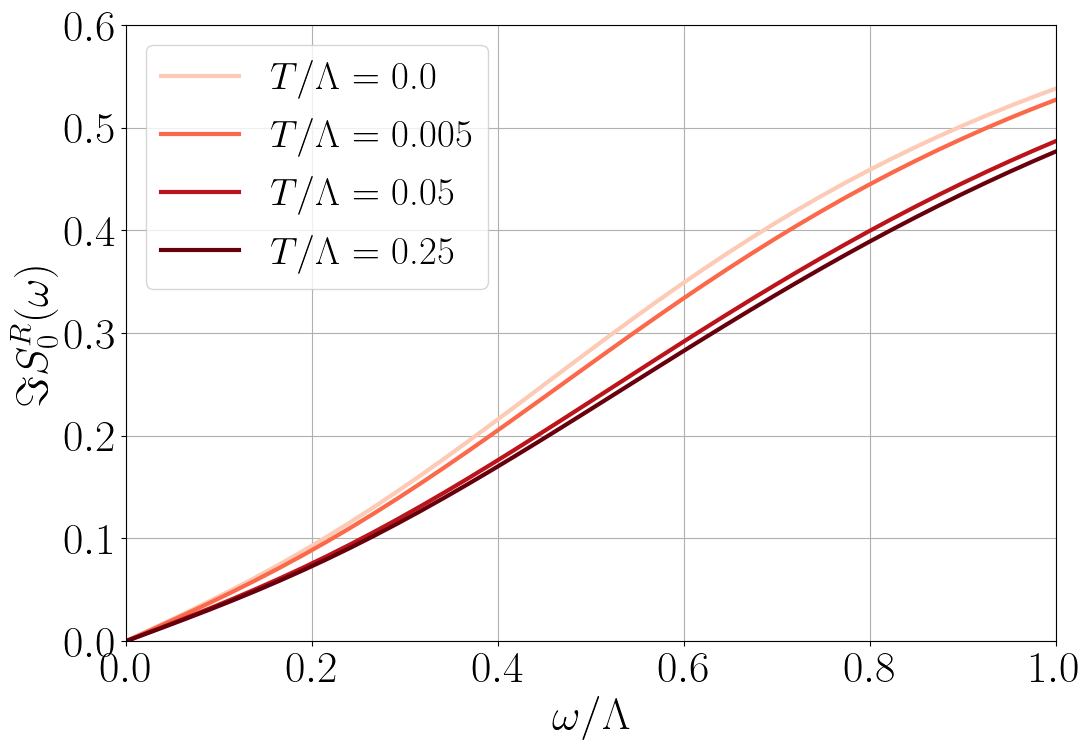

In [8]:
###* Case 2

omegaSpace = np.linspace(-2.0, 2.0, 80)

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(len(TSpace)):
    plt.plot(omegaSpace/2, retardedNonIntVzero[i,:].real, label=r'$T/\Lambda$ = ' + str(round(TSpace[i]/2,3)), linewidth=3, color=colorsVzero[i])
plt.legend(fontsize=28)
plt.grid()
plt.xlabel(r'$\omega/\Lambda$', fontsize=32)
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0.0, 1)
plt.ylim(0.0, 0.6)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.ylabel(r'$\Im S_{0}^R(\omega)$', fontsize=32)
plt.savefig("panelsCurrentNoise/ImSR_NonInt_Vomega.png", bbox_inches='tight', dpi=600)

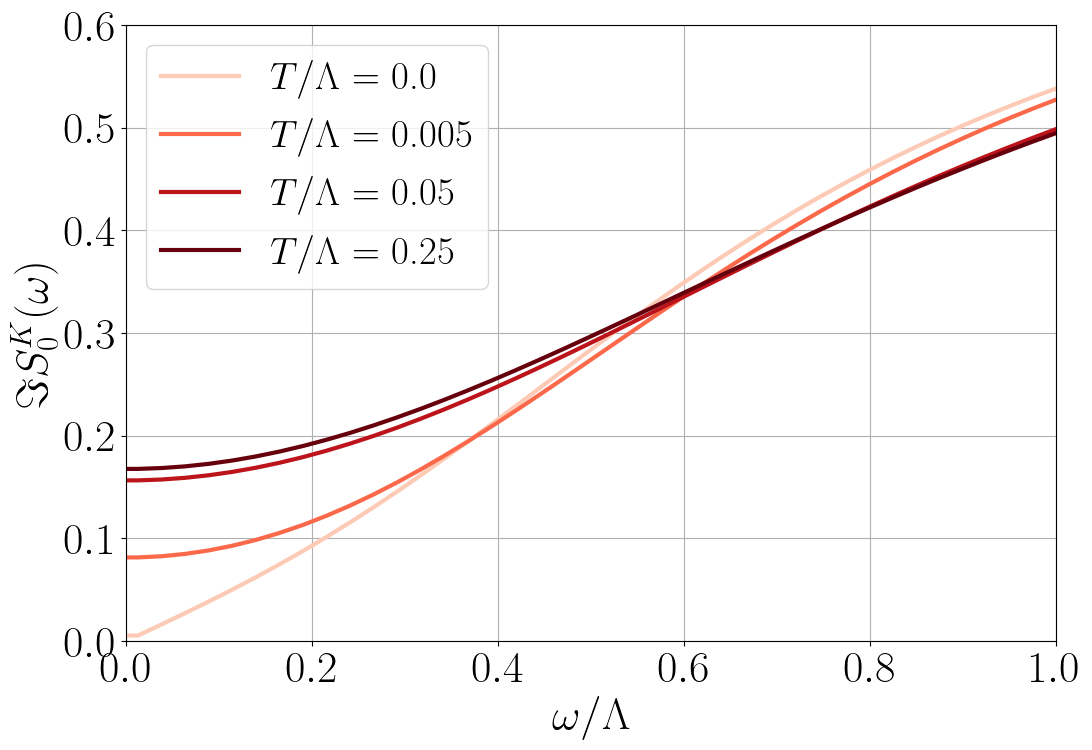

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
for i in range(len(TSpace)):
    plt.plot(omegaSpace/2, keldyshNonIntVzero[i,:].real,  label=r'$T/\Lambda$ = ' + str(round(TSpace[i]/2,3)), linewidth=3, color=colorsVzero[i])
plt.legend(fontsize=28)
plt.grid()
plt.xlabel(r'$\omega/\Lambda$', fontsize=32)
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0.0, 1)
plt.ylim(0.0, 0.6)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.ylabel(r'$\Im S_{0}^K(\omega)$', fontsize=32)
plt.savefig("panelsCurrentNoise/ImSK_NonInt_Vomega.png", bbox_inches='tight', dpi=600)

Text(0, 0.5, '$\\Im S_{0}^R(\\omega)/\\Im S_{0}^K(\\omega)$')

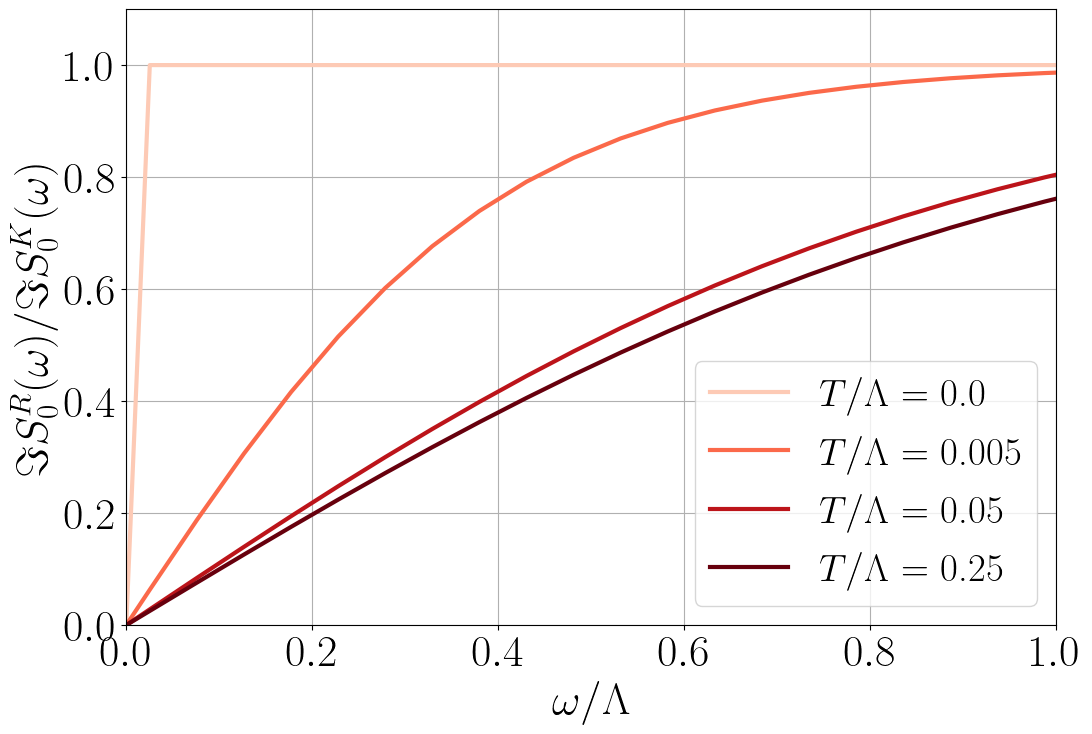

In [10]:
# retardedNonIntVzero[0,20:40].real = 1.0


fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

##* point 0+ on 0 should be smaller
for i in range(0, len(TSpace)):
    plt.plot(omegaSpace, retardedNonIntVzero[i,:].real/keldyshNonIntVzero[i,:].real,    label=r'$T/\Lambda$ = ' + str(round(TSpace[i]/2,3)), linewidth=3, color=colorsVzero[i])


plt.legend(fontsize=28)
plt.grid()
plt.xlabel(r'$\omega/\Lambda$', fontsize=32)
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0.0, 1)
plt.ylim(0.0, 1.1)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.ylabel(r'$\Im S_{0}^R(\omega)/\Im S_{0}^K(\omega)$', fontsize=32)
# plt.savefig("panelsCurrentNoise/FDR_NonInt_Vomega.png", bbox_inches='tight', dpi=600)